In [1]:
# import needed libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from scipy.signal import argrelextrema

In [2]:
# define ODE model
def goodwin (y0,t,parameters):
    # parameters
    p1 = parameters['p1'] #production rate of x
    p2 = parameters['p2'] #production rate of y
    p3 = parameters['p3'] #production rate of z
    d1 = parameters['d1'] #degradation rate of x
    d2 = parameters['d2'] #degradation rate of y
    d3 = parameters['d3'] #degradation rate of z
    K = parameters['K'] #EC50 for the Hill curve
    h = parameters['h'] #Hill exponent
    # variables
    x = y0[0]
    y = y0[1]
    z = y0[2]
    # ODEs
    dxdt = p1* K**h / (K**h + z**h) - d1*x
    dydt = p2*x - d2*y
    dzdt = p3*y - d3*z
    return [dxdt, dydt, dzdt]

Text(0.5, 0.98, 'Goodwin model for Hill coeff. h=6')

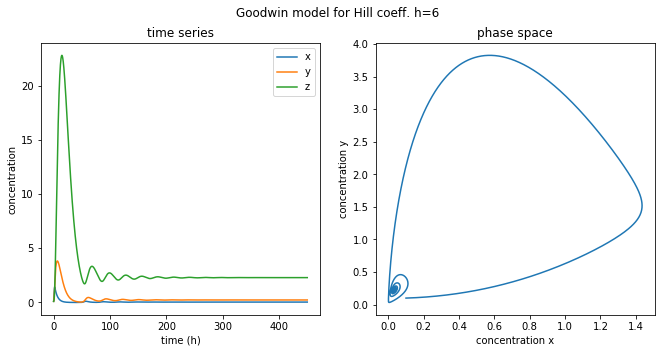

In [3]:
# define time, initial conditions and parameters for integration
t = np.arange(0, 450, 0.01)
y0 = [0.1, 0.1, 0.1]
parameters = {'p1':1, 'p2':1, 'p3':1,
              'd1':0.2, 'd2':0.15, 'd3':0.1,
              'K':1,  'h':6}

# solve ODE model
sol = odeint(goodwin, y0, t, args=(parameters,))
x = sol[:,0] 
y = sol[:,1] 
z = sol[:,2] 

# plot solution 
# subplot 1: time series
fig1 = plt.figure(figsize=(11,5))

ax1 = fig1.add_subplot(121)
ax1.plot(t, x, label='x')
ax1.plot(t, y, label='y')
ax1.plot(t, z, label='z')
ax1.legend()
ax1.set_xlabel('time (h)'); ax1.set_ylabel('concentration')
ax1.set_title('time series')

# subplot 2: phase space 
ax1 = fig1.add_subplot(122)
ax1.plot(x, y)
ax1.set_xlabel('concentration x'); ax1.set_ylabel('concentration y')
ax1.set_title('phase space')
fig1.suptitle('Goodwin model for Hill coeff. h={}'.format(parameters['h']))

Text(0.5, 0.98, 'Goodwin model for h=9.5')

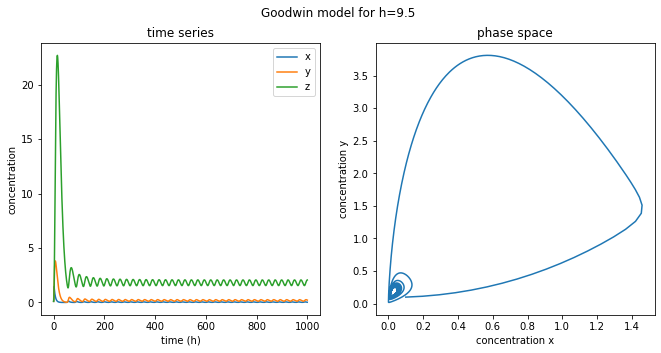

In [4]:
# increase Hill coefficient
parameters['h'] = 9.5 
dt = .1
t = np.arange(0, 1000, dt) #increase time array for integration

# solve ODE model
sol = odeint(goodwin, y0, t, args=(parameters,))
x = sol[:,0] 
y = sol[:,1] 
z = sol[:,2] 

# plot solution 
# subplot 1: time series
fig2 = plt.figure(figsize=(11,5))

ax1 = fig2.add_subplot(121)
ax1.plot(t, x, label='x')
ax1.plot(t, y, label='y')
ax1.plot(t, z, label='z')
ax1.legend()
ax1.set_xlabel('time (h)'); ax1.set_ylabel('concentration')
ax1.set_title('time series')

# subplot 2: phase space 
ax1 = fig2.add_subplot(122)
ax1.plot(x, y)
ax1.set_xlabel('concentration x'); ax1.set_ylabel('concentration y')
ax1.set_title('phase space')

fig2.suptitle('Goodwin model for h={}'.format(parameters['h']))

Text(0.5, 0.98, 'Goodwin model for h=9.5, d3=0.1')

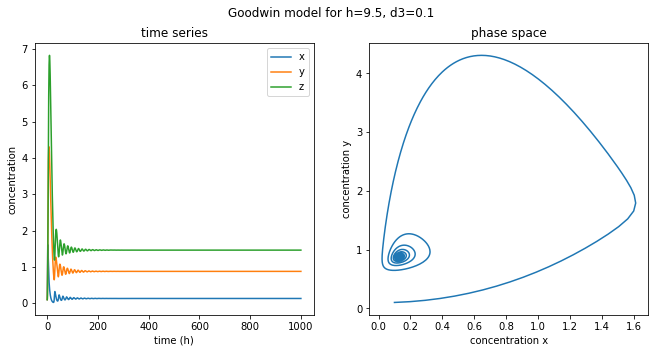

In [5]:
# Is the point of change affected by the choice of d1, d2, d3? Let's change these parameters and see
parameters2 = parameters.copy()
parameters2['d3'] = 0.6

# solve ODE model
sol2 = odeint(goodwin, y0, t, args=(parameters2,))
x2 = sol2[:,0] 
y2 = sol2[:,1] 
z2 = sol2[:,2] 

# plot solution 
# subplot 1: time series
fig3 = plt.figure(figsize=(11,5))

ax1 = fig3.add_subplot(121)
ax1.plot(t, x2, label='x')
ax1.plot(t, y2, label='y')
ax1.plot(t, z2, label='z')
ax1.legend()
ax1.set_xlabel('time (h)'); ax1.set_ylabel('concentration')
ax1.set_title('time series')

# subplot 2: phase space 
ax1 = fig3.add_subplot(122)
ax1.plot(x2, y2)
ax1.set_xlabel('concentration x'); ax1.set_ylabel('concentration y')
ax1.set_title('phase space')

fig3.suptitle('Goodwin model for h={}, d3={}'.format(parameters['h'], parameters['d3']))

Text(0, 0.5, 'concentration')

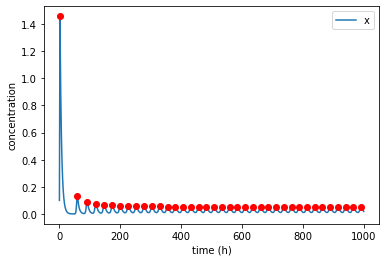

In [6]:
# period of oscillations
# ----------------------
# the period of oscillations can be calculated as the peak-to-peak distance of x (or y, or z --> should be the same)
peaks_x_location = argrelextrema(x, np.greater)[0] #this gives us the indeces where x has a peak in the x array
t_peaks_x = t[peaks_x_location] #to find what are the values of time at the peaks_x, we just plug in the indeces to the time_array
peaks_x = x[peaks_x_location] #this helps for the following visualization, it tells us the values of x at the peaks_x

fig4 = plt.figure()
ax1 = fig4.add_subplot(111)
ax1.plot(t, x, label='x')
ax1.plot(t_peaks_x, peaks_x, 'o', c='red')
ax1.legend()
ax1.set_xlabel('time (h)'); ax1.set_ylabel('concentration') 

In [7]:
# So now we have the peaks of x, but we want to calculate the peak-to-peak distance WITHIN THE LIMIT CYCLE
# this means that we are not interested on the first peaks (that part of the oscillation is termed TRANSIENT)
time_last_peaks_x = t_peaks_x[-10:] #let's take the last 10 peaks to make sure we are in the limit cycle
print(time_last_peaks_x)

[762.6 788.  813.4 838.8 864.2 889.6 915.  940.4 965.8 991.1]


In [8]:
# and now we calculate what's the difference between the times from time_last_peaks_x
peak_to_peak_distances = np.diff(time_last_peaks_x)
print(peak_to_peak_distances)

[25.4 25.4 25.4 25.4 25.4 25.4 25.4 25.4 25.3]


In [9]:
# and we can take the average of the last array as our period value
period = peak_to_peak_distances.mean()
print('The period of the Goodwin oscillator for Hill coefficient of {} is : {}h'.format(parameters2['h'], format(period, '.2f')))

The period of the Goodwin oscillator for Hill coefficient of 9.5 is : 25.39h


Text(0, 0.5, 'relative concentration')

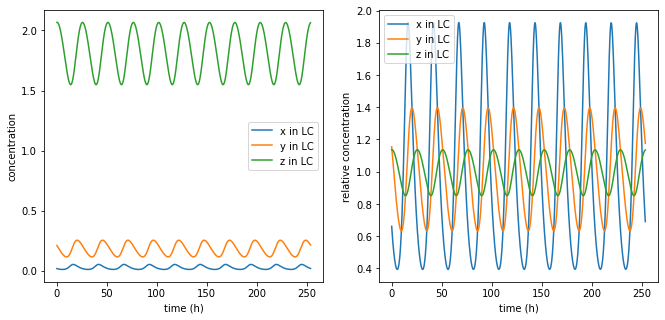

In [10]:
# relative amplitude of oscillations
# ----------------------------------
# to calculate the relative amplitude of oscillations, we have to normalize all oscillating variables (ONCE THEY ARE AT THE LIMIT CYCLE) to their mean
# let's remove the first part of the oscillation (TRANSIENT) and keep just the last 10 periods of the oscillation (LIMIT CYCLE)
sol_LC = sol[-int(10*period/dt):, :]
x_LC = sol_LC[:,0]
y_LC = sol_LC[:,1]
z_LC = sol_LC[:,2]
t_LC = t[0:int(10*period/dt)]

fig5 = plt.figure(figsize=(11,5))
ax1 = fig5.add_subplot(121) #--> here we see that the transients have been removed :)
ax1.plot(t_LC, x_LC, label='x in LC')
ax1.plot(t_LC, y_LC, label='y in LC')
ax1.plot(t_LC, z_LC, label='z in LC')
ax1.legend()
ax1.set_xlabel('time (h)'); ax1.set_ylabel('concentration') 

# now we can normalize each variable to its oscillating mean
x_LC_norm = x_LC/x_LC.mean()
y_LC_norm = y_LC/y_LC.mean()
z_LC_norm = z_LC/z_LC.mean()

ax2 = fig5.add_subplot(122) #--> here we see the normalized solutions
ax2.plot(t_LC, x_LC_norm, label='x in LC')
ax2.plot(t_LC, y_LC_norm, label='y in LC')
ax2.plot(t_LC, z_LC_norm, label='z in LC')
ax2.legend()
ax2.set_xlabel('time (h)'); ax2.set_ylabel('relative concentration') 

# Who should have the largest amplitude: x, y, or z?

In [11]:
# calculate peaks (maxima) and troughs (minima) of x, y, z
indexes_x_max = argrelextrema(x_LC_norm, np.greater)[0] #first we find at which positions in the x_LC_norm array are the peaks/troughs located
indexes_x_min = argrelextrema(x_LC_norm, np.less)[0]
peaks_x   = x_LC_norm[indexes_x_max] #and then we plug these positions in the x_LC_norm array to find the value
troughs_x = x_LC_norm[indexes_x_min]

indexes_y_max = argrelextrema(y_LC_norm, np.greater)[0]
indexes_y_min = argrelextrema(y_LC_norm, np.less)[0]
peaks_y   = y_LC_norm[indexes_y_max]
troughs_y = y_LC_norm[indexes_y_min]

indexes_z_max = argrelextrema(z_LC_norm, np.greater)[0]
indexes_z_min = argrelextrema(z_LC_norm, np.less)[0]
peaks_z   = z_LC_norm[indexes_z_max]
troughs_z = z_LC_norm[indexes_z_min]

# We can now determine the relative amplitude of x,y,z as the peak-to-trough distance
relamp_x = peaks_x[-1] - troughs_x[-1]
relamp_y = peaks_y[-1] - troughs_y[-1]
relamp_z = peaks_z[-1] - troughs_z[-1]
print('Relative amplitude of x = {}; of y = {}; of z = {}'.format(format(relamp_x, '.2f'), format(relamp_y, '.2f'), format(relamp_z, '.2f')))

# Check with the time series that the values make sense

Relative amplitude of x = 1.53; of y = 0.76; of z = 0.28


In [15]:
# Who peaks first and latest? What is the phase shift between x and z?
# from the time series it is seen how x peaks first, then y and then z
# let's find out the time at which x is at is maximum and the time at which z is at its maximum (to calculate phase shift)
t_x_max = t_LC[indexes_x_max]
t_z_max = t_LC[indexes_z_max]

# The phase shift between z and x can be calculated by substracting the time of last peak of z minus the time of last peak of x
phase_shift_zx = t_z_max[-1] - t_x_max[-1]
if phase_shift_zx < 0:
    phase_shift_zx += period
print('Phase shift between z and x = {}h'.format(format(phase_shift_zx, '.2f')))

Phase shift between z and x = 9.29h


3.1896321719452407 3.1896321719452407
2.2907801080698587 2.2907801080698587
1.9056502574023666 1.9056502574023666
[2.14026761 2.14027977 2.1402833  2.14027824 2.1402647  2.14027677
 2.14028276 2.14028033 2.14027014 2.14027233 2.14028177 2.1402825
 2.14027472 2.14026612 2.14027889 2.14028293 2.14027833 2.14026545
 2.14027507 2.14028213 2.14028068 2.1402708  2.14027058 2.14028081
 2.14028254 2.14027548 2.14026478 2.140278   2.14028264 2.14027932
 2.14026751 2.1402745  2.1402822  2.1402816  2.14027248 2.14026914
 2.14028046 2.14028288 2.14027683 2.14026322 2.14027716 2.14028287
 2.14027992 2.14026843 2.14027335 2.14028189 2.14028195 2.14027367
 2.14026775 2.14027929 2.14028241 2.14027761 2.14026408 2.14027621
 2.14028247 2.14028053 2.14027021 2.14027234 2.14028187 2.14028274
 2.14027504 2.1402667  2.14027905 2.14028308 2.14027828 2.14026571
 2.14027539 2.14028237 2.1402808  2.14027078 2.14027063 2.14028109
 2.14028285 2.14027588 2.14026474 2.14027834 2.14028303 2.14027932
 2.14026697 2.14

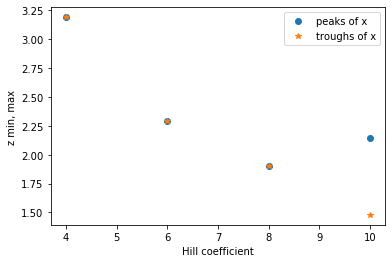

In [16]:
# Hopf bifurcation
# ----------------
# find peaks and troughs for n=4, 6, 8, 10 
hill_values = np.array([4,6,8,10])
t = np.arange(0, 10000, dt)

peaks_z, troughs_z = [], [] #empty lists to store results
for n in hill_values:
    # change Hill coefficient in each iteration
    parameters['h'] = n

    # solve ODE for new Hill value and focus only on the limit cycle
    sol = odeint(goodwin, y0, t, args=(parameters,))
    sol_LC = sol[-int(2500/dt):, :] #take last fourth of the time series

    # calculate peaks and troughs of z
    z_LC = sol_LC[:,2]
    indexes_z_max = argrelextrema(z_LC, np.greater)[0]
    indexes_z_min = argrelextrema(z_LC, np.less)[0]
    max_z = z_LC[indexes_z_max]
    min_z = z_LC[indexes_z_min]

    # maybe the system doesn't oscillate at all and argrelextrema cannot find any max/min:
    # in that case we take as max_z or min_z the last value of the time series (steady state)
    max_z = max_z if len(max_z)>1 else z_LC[-1]
    min_z = min_z if len(min_z)>1 else z_LC[-1]    
    print(max_z, min_z)

    # take average of peaks and average of troughs as the oscillation's peak/trough
    peak_z = max_z.mean() 
    trough_z = min_z.mean() 
    
    # append and store in the peaks_z / troughs_z lists
    peaks_z.append(peak_z); troughs_z.append(trough_z)

peaks_z = np.asarray(peaks_z)
troughs_z = np.asarray(troughs_z)

# plot results: peaks and troughs of x vs Hill coefficients
fig6 = plt.figure()
ax1 = fig6.add_subplot(111)
ax1.plot(hill_values, peaks_z, 'o', label='peaks of x')
ax1.plot(hill_values, troughs_z, '*', label='troughs of x')
ax1.set_xlabel('Hill coefficient'); ax1.set_ylabel('z min, max')
ax1.legend()



/home/mlhm/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:40: RuntimeWarning: Mean of empty slice.
/home/mlhm/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Text(0, 0.5, 'period (h)')

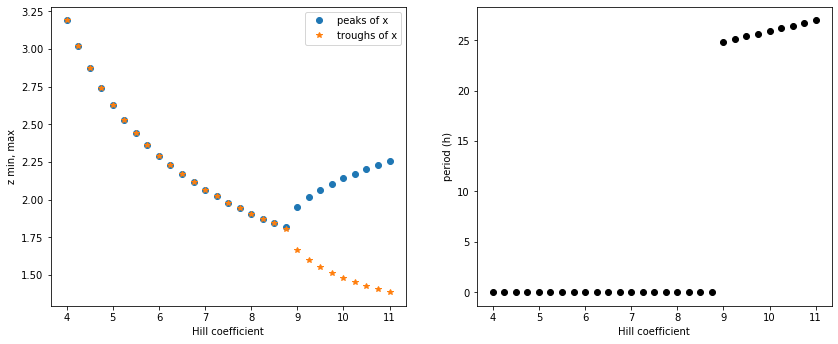

In [17]:
# now do the same but increasing the Hill coefficient by steps of 0.25
hill_values = np.arange(4, 11.25, 0.25)
t = np.arange(0, 10000, dt)

peaks_z, troughs_z, periods = [], [], [] #empty lists to store results
for n in hill_values:
    # change Hill coefficient in each iteration
    parameters['h'] = n

    # solve ODE for new Hill value and focus only on the limit cycle
    sol = odeint(goodwin, y0, t, args=(parameters,))
    sol_LC = sol[-int(2500/dt):, :] #take last fourth of the time series

    # calculate peaks and troughs of z
    # --------------------------------
    z_LC = sol_LC[:,2]
    indexes_z_max = argrelextrema(z_LC, np.greater)[0]
    indexes_z_min = argrelextrema(z_LC, np.less)[0]
    max_z = z_LC[indexes_z_max]
    min_z = z_LC[indexes_z_min]

    # maybe the system doesn't oscillate at all and argrelextrema cannot find any max/min:
    # in that case we take as max_z or min_z the last value of the time series (steady state)
    max_z = max_z if len(max_z)>1 else z_LC[-1]
    min_z = min_z if len(min_z)>1 else z_LC[-1]    

    # take average of peaks and average of troughs as the oscillation's peak/trough
    peak_z = max_z.mean() 
    trough_z = min_z.mean() 
    
    # append and store in the peaks_z / troughs_z lists
    peaks_z.append(peak_z); troughs_z.append(trough_z)

    # calculate period
    # ----------------
    t_LC = t[-int(2500/dt):]
    t_peaks_z = t[indexes_z_max]

    pers = np.diff(t_peaks_z)
    per = pers.mean()
    
    # if the peak_z is almost the same value as trough_z we assume that the system is NOT oscillating
    # and we set the period to 0. We do this by setting a threshold of 0.1
    per = 0 if peak_z - trough_z < 0.1 else per
    periods.append(per)

peaks_z = np.asarray(peaks_z)
troughs_z = np.asarray(troughs_z)
periods = np.asarray(periods)

# plot results: peaks and troughs of x vs Hill coefficients
fig7 = plt.figure(figsize=(14,5.5))
ax1 = fig7.add_subplot(121)
ax1.plot(hill_values, peaks_z, 'o', label='peaks of x')
ax1.plot(hill_values, troughs_z, '*', label='troughs of x')
ax1.legend()
ax1.set_xlabel('Hill coefficient'); ax1.set_ylabel('z min, max')

# plot results: periods vs Hill coefficients
ax2 = fig7.add_subplot(122)
ax2.plot(hill_values, periods, 'o', color='black')
ax2.set_xlabel('Hill coefficient'); ax2.set_ylabel('period (h)')